# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#creating empty lists and sets
#for loop to append the correct information to find the city info

lat = []
long = []
temp = []
humidity = []
windspeed = []
city_name = []
clouds = []
country = []
date_date = []
citynum = 0
citynull = 0

for city in cities:
    url_url = f"http://api.openweathermap.org/data/2.5/weather?&q={city}&appid={weather_api_key}"
    response = requests.get(url_url)
    responsej = response.json()
    time.sleep(.5)
    try:
        lat.append(responsej['coord']['lat'])
        long.append(responsej['coord']['lon'])
        temp.append(responsej['main']['temp'])
        humidity.append(responsej['main']['humidity'])
        windspeed.append(responsej['wind']['speed'])
        city_name.append(responsej['name'])
        country.append(responsej['sys']['country'])
        date_date.append(responsej['dt'])
        clouds.append(responsej['clouds']['all'])
        citynum += 1
        print(f"getting data from {citynum} - {city}")
    except:
        citynull +=1
        print(f"{citynull} - {city} not found")
        pass


getting data from 1 - launceston
getting data from 2 - venice
getting data from 3 - geraldton
getting data from 4 - kodiak
getting data from 5 - los llanos de aridane
getting data from 6 - atuona
getting data from 7 - albany
1 - cagayan de tawi-tawi not found
2 - portpatrick not found
getting data from 8 - jinka
getting data from 9 - mahebourg
getting data from 10 - boralday
3 - suao not found
getting data from 11 - mataura
getting data from 12 - lebu
getting data from 13 - kapaa
getting data from 14 - yellowknife
getting data from 15 - champerico
getting data from 16 - bambous virieux
getting data from 17 - khatanga
getting data from 18 - punta arenas
getting data from 19 - sistranda
getting data from 20 - jamestown
getting data from 21 - east london
getting data from 22 - roma
getting data from 23 - cape town
getting data from 24 - odda
4 - vaitupu not found
getting data from 25 - bahia blanca
getting data from 26 - micheweni
getting data from 27 - mareeba
getting data from 28 - new 

getting data from 237 - kharovsk
getting data from 238 - solnechnyy
getting data from 239 - narsaq
getting data from 240 - road town
getting data from 241 - kawalu
getting data from 242 - talnakh
getting data from 243 - sur
getting data from 244 - istanbul
getting data from 245 - mehamn
getting data from 246 - carnarvon
getting data from 247 - manggar
getting data from 248 - leh
getting data from 249 - chuzhou
getting data from 250 - tobermory
getting data from 251 - yulara
getting data from 252 - taoudenni
getting data from 253 - kenai
getting data from 254 - horsham
getting data from 255 - ribeira grande
getting data from 256 - mihai bravu
getting data from 257 - arman
getting data from 258 - pangnirtung
getting data from 259 - arlit
getting data from 260 - katangli
getting data from 261 - bosaso
getting data from 262 - labranzagrande
getting data from 263 - luderitz
getting data from 264 - grand-lahou
getting data from 265 - carrickmacross
getting data from 266 - san quintin
getting

getting data from 468 - puerto del rosario
getting data from 469 - vostok
getting data from 470 - shubarshi
getting data from 471 - alice springs
getting data from 472 - liwale
getting data from 473 - nokaneng
getting data from 474 - pattani
getting data from 475 - dali
getting data from 476 - quatre cocos
getting data from 477 - coquimbo
getting data from 478 - mana
getting data from 479 - coahuayana
getting data from 480 - ranong
getting data from 481 - tuy hoa
getting data from 482 - henties bay
getting data from 483 - clonakilty
getting data from 484 - lugovoy
getting data from 485 - craig
getting data from 486 - derzhavinsk
getting data from 487 - ahuimanu
getting data from 488 - bamnet narong
getting data from 489 - praia da vitoria
getting data from 490 - rock sound
getting data from 491 - araouane
getting data from 492 - san nicolas
getting data from 493 - kodinsk
getting data from 494 - prince rupert
getting data from 495 - vyselki
getting data from 496 - chokwe
getting data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#creating sorted info into dataframe
summary_city_info = {"City": city_name, 
                     "Lat": lat, 
                     "Lng": long,
                     "Max Temp": temp,
                     "Humidity": humidity, 
                     "Cloudiness": clouds, 
                     "Wind Speed": windspeed, 
                     "Country": country, 
                     "date": date_date}
summary_city_info_df = pd.DataFrame(summary_city_info)
summary_city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Launceston,-41.4500,147.1667,286.97,94,64,2.06,AU,1615477969
1,Venice,27.0998,-82.4543,297.01,57,1,6.17,US,1615477729
2,Geraldton,-28.7667,114.6000,296.15,83,4,4.12,AU,1615477970
3,Saint Paul Harbor,57.7900,-152.4072,266.15,38,1,12.35,US,1615477679
4,Los Llanos de Aridane,28.6585,-17.9182,291.85,60,20,5.14,ES,1615477970


In [10]:
#seperated df to northern and southern hems

southhem = summary_city_info_df['Lat'] < 0
northhem = summary_city_info_df['Lat'] > 0

In [11]:
summary_city_info_df[northhem]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
1,Venice,27.0998,-82.4543,297.01,57,1,6.17,US,1615477729
3,Saint Paul Harbor,57.7900,-152.4072,266.15,38,1,12.35,US,1615477679
4,Los Llanos de Aridane,28.6585,-17.9182,291.85,60,20,5.14,ES,1615477970
6,Albany,42.6001,-73.9662,283.75,60,64,0.89,US,1615478260
7,Jinka,5.6500,36.6500,297.01,41,48,0.70,ET,1615478262
...,...,...,...,...,...,...,...,...,...
587,Rabat,33.9911,-6.8401,291.34,72,0,5.14,MA,1615478311
589,Dukat,62.5500,155.5500,248.85,70,37,1.00,RU,1615478771
592,Poltavka,54.3663,71.7632,260.36,86,99,8.86,RU,1615478774
593,Igarka,67.4667,86.5833,238.76,96,0,2.24,RU,1615478775


In [12]:
summary_city_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,date
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02
mean,19.166291,19.137606,286.606034,69.206723,52.836975,4.189412,1.615478e+09
std,32.503489,89.606231,16.381328,21.099156,37.614991,2.968498,1.940362e+02
min,-54.800000,-175.200000,238.230000,4.000000,0.000000,0.180000,1.615478e+09
25%,-7.973850,-60.933450,277.150000,57.000000,14.500000,2.060000,1.615478e+09
50%,22.788600,25.570100,292.800000,73.000000,60.000000,3.350000,1.615479e+09
75%,45.823600,99.683850,299.150000,85.000000,90.000000,5.780000,1.615479e+09
max,78.218600,179.316700,313.220000,100.000000,100.000000,17.560000,1.615479e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
print("There are no cities with humidity over 100% as found through the describe")

There are no cities with humidity over 100% as found through the describe


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
# there are none that was found through the .describe() above


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

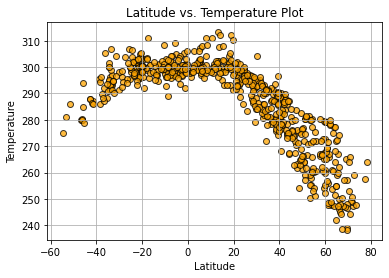

This is analyzing that there is a good coorelation between latitude and temperature


In [16]:
#Latitude vs. Temperature Plot
lataxis = summary_city_info_df['Lat']
tempaxis = summary_city_info_df['Max Temp']
humaxis = summary_city_info_df['Humidity']
cldaxis = summary_city_info_df['Cloudiness']
wndaxis = summary_city_info_df['Wind Speed']

plt.scatter(lataxis,tempaxis,marker='o',facecolor='orange',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()
print("This is analyzing that there is a good coorelation between latitude and temperature")

## Latitude vs. Humidity Plot

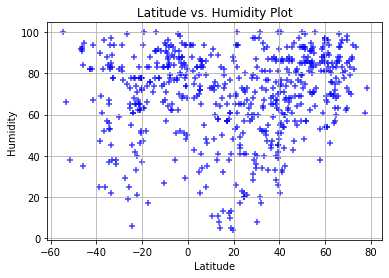

this is showing that the latitude does not give a clear answer about the humidity


In [17]:
#Latitude vs. Humidity Plot
plt.scatter(lataxis,humaxis,marker='+',facecolor='blue',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
print("this is showing that the latitude does not give a clear answer about the humidity")

## Latitude vs. Cloudiness Plot

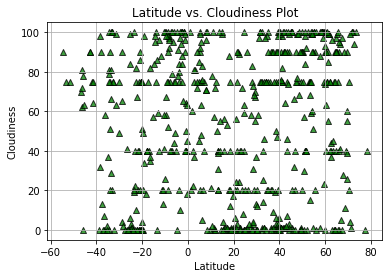

this is showing that the latitudes greater than 0 have a higher cloud cover


In [18]:
#Latitude vs. Cloudiness Plot
plt.scatter(lataxis,cldaxis,marker='^',facecolor='green',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()
print("this is showing that the latitudes greater than 0 have a higher cloud cover")

## Latitude vs. Wind Speed Plot

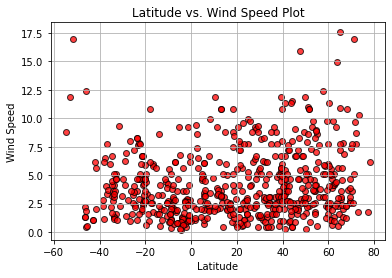

this is showing that windspeed, ragardless of latitude, typically stays lower,though peeks higher more frequently as we get above the equator


In [19]:
#Latitude vs. Wind Speed Plot
plt.scatter(lataxis,wndaxis,marker='o',facecolor='red',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
print("this is showing that windspeed, ragardless of latitude, typically stays lower,though peeks higher more frequently as we get above the equator")

## Linear Regression

In [20]:
#    variables for the hemisphere data
#northhem
#southhem

# max temp
nortemp = summary_city_info_df[northhem]['Max Temp']
soutemp = summary_city_info_df[southhem]['Max Temp']
# latitude
norlat = summary_city_info_df[northhem]['Lat']
soulat = summary_city_info_df[southhem]['Lat']
# humidity %
norhum = summary_city_info_df[northhem]['Humidity']
souhum = summary_city_info_df[southhem]['Humidity']
# cloudiness %
norcloud = summary_city_info_df[northhem]['Cloudiness']
soucloud = summary_city_info_df[southhem]['Cloudiness']
# wind speed mph
norwind = summary_city_info_df[northhem]['Wind Speed']
souwind = summary_city_info_df[southhem]['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7999151919393717
This says the Max Temp and Latitude in the Northern Hemisphere as a coorelation of 0.8% which is a great coorelation


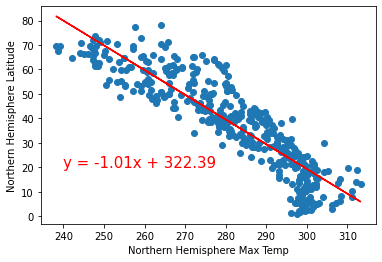

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nortemp, norlat)
regress_values = nortemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nortemp, norlat)
plt.plot(nortemp,regress_values,"r-")
plt.annotate(line_eq,(240,20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Max Temp')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Max Temp and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which is a great coorelation")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3635950648049799
This says the Max Temp and Latitude in the Southern Hemisphere as a coorelation of 0.36% which says there is no coorelation


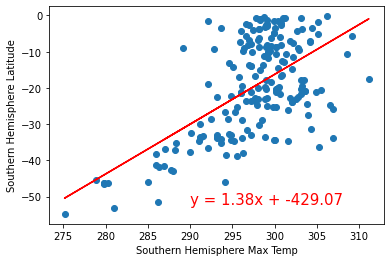

In [22]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(soutemp, soulat)
regress_values = soutemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(soutemp, soulat)
plt.plot(soutemp,regress_values,"r-")
plt.annotate(line_eq,(290,-52),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Max Temp')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Max Temp and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11221724042659571
This says the Humidity and Latitude in the Northern Hemisphere as a coorelation of 0.11% which says there is no coorelation


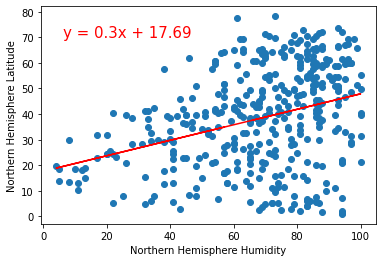

In [23]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(norhum, norlat)
regress_values = norhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(norhum, norlat)
plt.plot(norhum,regress_values,"r-")
plt.annotate(line_eq,(6,70),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Humidity')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Humidity and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022652913419493943
This says the Humidity and Latitude in the Southern Hemisphere as a coorelation of 0.02% which says there is no coorelation


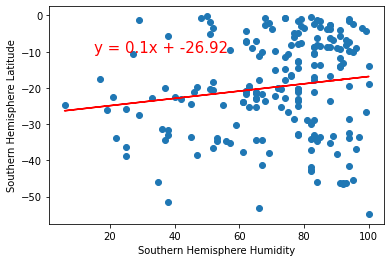

In [24]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(souhum, soulat)
regress_values = souhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(souhum, soulat)
plt.plot(souhum,regress_values,"r-")
plt.annotate(line_eq,(15,-10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Humidity')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Humidity and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03882448848943367
This says the Cloudiness and Latitude in the Northern Hemisphere as a coorelation of 0.04% which says there is no coorelation


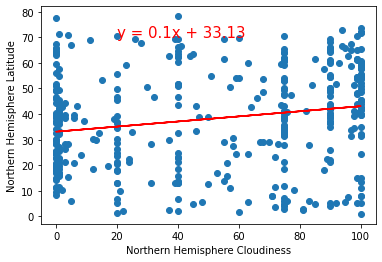

In [25]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(norcloud, norlat)
regress_values = norcloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(norcloud, norlat)
plt.plot(norcloud,regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Cloudiness')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Cloudiness and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0310963208878288
This says the Cloudiness and Latitude in the Southern Hemisphere as a coorelation of 0.03% which says there is no coorelation


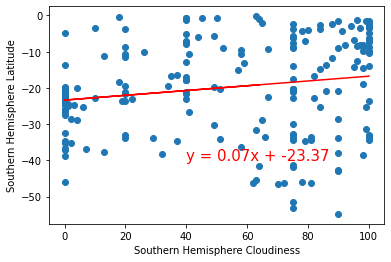

In [26]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(soucloud, soulat)
regress_values = soucloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(soucloud, soulat)
plt.plot(soucloud,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Cloudiness')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Cloudiness and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015026934852870896
This says the Wind Speed and Latitude in the Northern Hemisphere as a coorelation of 0.02% which says there is no coorelation


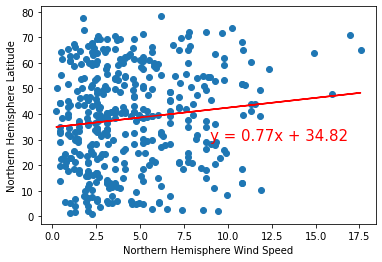

In [27]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(norwind, norlat)
regress_values = norwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(norwind, norlat)
plt.plot(norwind,regress_values,"r-")
plt.annotate(line_eq,(9,30),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Wind Speed')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Wind Speed and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07314491211699836
This says the Wind Speed and Latitude in the Southern Hemisphere as a coorelation of 0.07% which says there is no coorelation


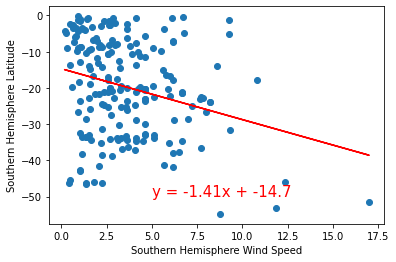

In [28]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(souwind, soulat)
regress_values = souwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(souwind, soulat)
plt.plot(souwind,regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Wind Speed')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Wind Speed and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

In [29]:
#outputting file to CSV
summary_city_info_df.to_csv("Output/summarycityinfo.csv", index=False, header=True)